<a href="https://colab.research.google.com/github/laksmisetiawati/testlagi/blob/master/%5BDEEPP_JAN24%5D_Laksmi_Setiawati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Dataset

to help understanding dataset

## ERD

![[W6W7W8_JAN24]_Laksmi_Setiawati_Intermediate_ERD (1).png](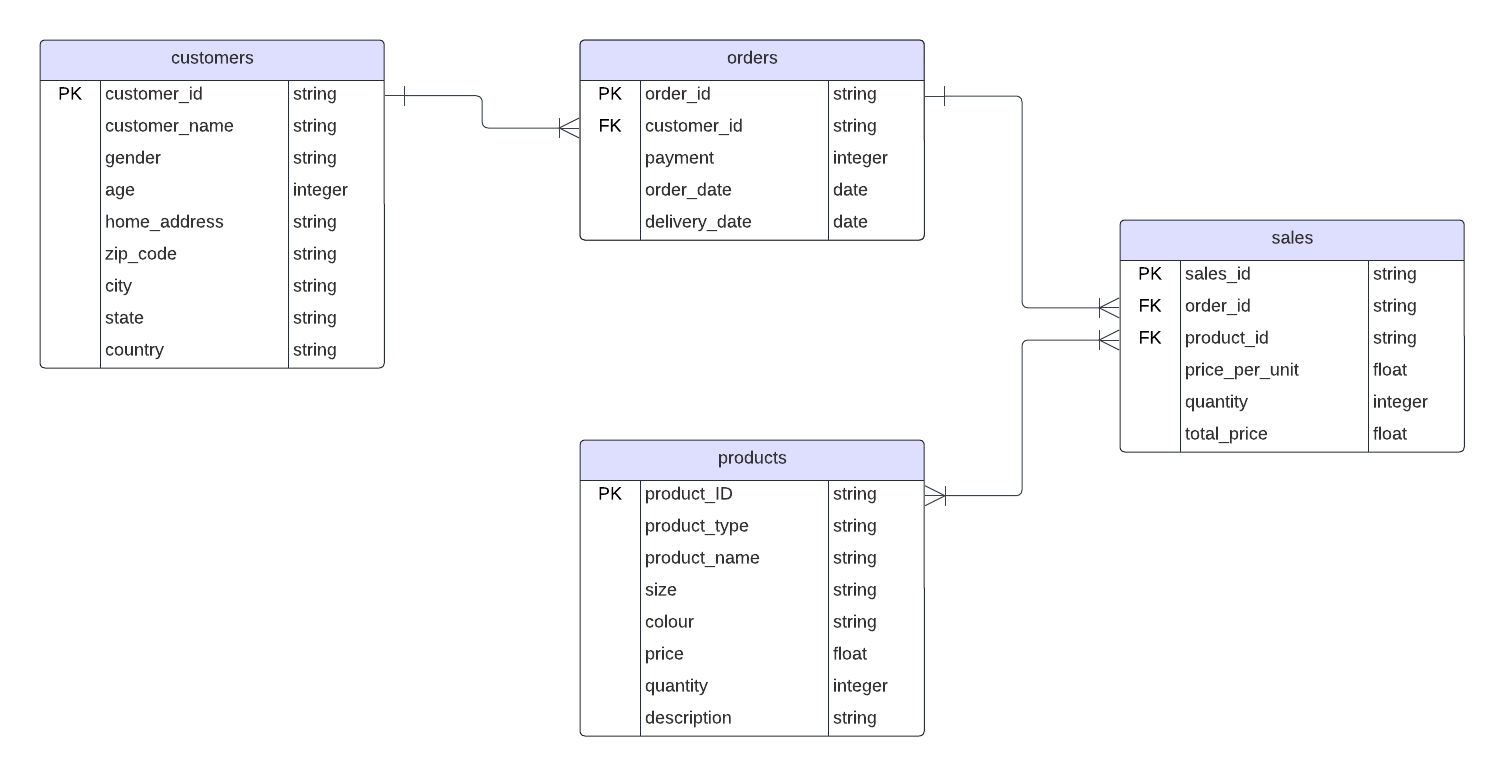)

## Dataset Dictionary

to help understanding dataset
https://docs.google.com/spreadsheets/d/19OxYwKlRIGogg_YgsqfzAfKyy3iKowljqhJfaKkXGk4/

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt         # Bikin grafik
import seaborn as sns                   # Bikin grafik

from google.colab import files

from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from yellowbrick.cluster import SilhouetteVisualizer                           # Untuk melakukan analisis siluet untuk k-means clustering

In [ ]:
# In case want to check manualy

# Set up option to display max row to show all rows or not
# Copy-paste this code
# pd.reset_option('display.max_rows')
# pd.set_option('display.max_rows', None)

# Copy-paste this code to show all rows by shorting
# sorted_df = your_df.sort_values(by=['your_column'], ascending=True)
# sorted_df

# Import Datasets

## Customers Dataset

In [ ]:
url_customers = "https://docs.google.com/spreadsheets/d/1e7SAqnbPGCLMwLonlVLz3CfCiRvKOFmisMkdGyqAuDg/export?format=csv&gid=1788562645"
df_customers = pd.read_csv(url_customers)
df_customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,9,Brittaney Gontier,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia
1,919,Belia Hovard,Genderqueer,64,443 Jesse MewsApt. 726,24,New Imogen,Queensland,Australia
2,880,Kimbell Rawsen,Male,41,8674 Hermiston CrestApt. 615,27,North Aaronborough,Tasmania,Australia
3,583,Prissie Dumelow,Genderqueer,52,98 Ellie CircleSuite 311,8267,Leomouth,Northern Territory,Australia
4,770,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,2694,Port Isabelle,South Australia,Australia


## Orders Dataset

In [ ]:
url_orders = "https://docs.google.com/spreadsheets/d/1r7G-0uR7_WmTQRqKRtAMAYnoYLByZptsKdeJWZSYZFg/export?format=csv&gid=148241857"
df_orders = pd.read_csv(url_orders)
df_orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,455,1,24550,2021-4-4,2021-04-06
1,670,1,10246,2021-3-6,2021-04-01
2,729,1,35593,2021-2-18,2021-03-01
3,465,7,48935,2021-5-21,2021-05-23
4,595,10,45626,2021-3-9,2021-03-29


## Products Dataset

In [ ]:
url_products = "https://docs.google.com/spreadsheets/d/1fRs4FaKuKQzAhNblSXxbyggxRrJDmIJdzOO8qpTkWVQ/export?format=csv&gid=1424971115"
df_products = pd.read_csv(url_products)
df_products.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


## Sales Dataset

In [ ]:
url_sales = "https://docs.google.com/spreadsheets/d/1pNJxO3LQPx4J_rFdB947DmXNvy7u83qLbmD-ZZbFf-k/export?format=csv&gid=214184755"
df_sales = pd.read_csv(url_sales)
df_sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


# Data Cleaning

## Check Unique Value From Categorical

There are the categorical column:

From dataset Customers:
* `gender`
* `zip_code`
* `city`
* `state`
* `country`

From dataset Orders: there're no categorical column

From dataset Products:
* `product_type`
* `product_name`
* `size`
* `colour`

From dataset Sales: there're no categorical column

### Customers Dataset

In [ ]:
dfc_1 = df_customers.copy()

#### Check Unique Gender

In [ ]:
dfc_1['gender'].value_counts()

gender
Male           143
Non-binary     131
Polygender     128
Genderqueer    127
Genderfluid    122
Bigender       120
Female         115
Agender        114
Name: count, dtype: int64

There's no odd gender.

Let's talk a bit about gender definition to understand about dataset

* Male           :

* Non-binary     : Someone who does not identify as a man or a woman, or solely as one of those two genders.

* Polygender     : Someone who experiences more than one gender identity. It can be used as a gender identity in its own right, or can be an umbrella term for other identities which fit this description.

* Genderqueer    : Someone may identify as genderqueer if their gender identity is neither male nor female, is between or beyond genders, or is some combination of genders.

* Genderfluid    : Someone who does not necessarily identify themselves as having a fixed gender.

* Bigender       :

* Female         :

* Agender        : Someone who does not identify as a man or a woman, no personal alignment with the an identity under the nonbinary and transgender.

source:
* https://teentalk.ca/learn-about/gender-identity
* https://www.bu.edu/diversity/resources/self-guided-education/living-language-guide/gender-and-sexuality

#### Check Unique Zip Code

In [ ]:
# pd.set_option('display.max_rows', None)
# dfc_1['zip_code'].value_counts().sort_index(ascending=True)

In [ ]:
# pd.reset_option('display.max_rows')

Found out there're lot of incorrent digits  zip_code.

After check them in excel (to make it easier), Found out there're 97 rows with incorrent digits of zip code 😟

Here's gsheet link :
https://docs.google.com/spreadsheets/d/17OQlZVr0K6yzXVULTeXlA7YKDpRbXF1Ra5QCQXnCHSE/

Let's take a look at below screenshot:

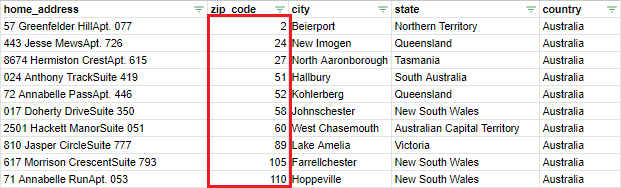

There're also 10 rows with condition same city, same state but different zip code 😟

Take a look at the example below:

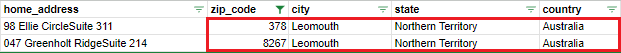

Let's continue data cleaning first before make decision 😀

#### Check Unique City

In [ ]:
# pd.set_option('display.max_rows', None)
# dfc_1['city'].value_counts().sort_index(ascending=True)

In [ ]:
# pd.reset_option('display.max_rows')

Found out there're too much unique cities 😟

There're 54 rows same city with different state. For example take a look at below screenshot:

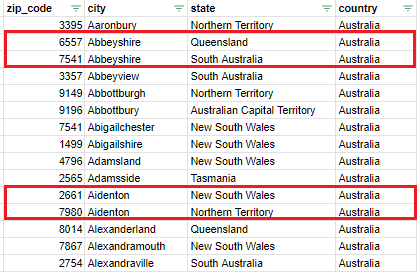

The list: Abbeyshire, Aidenton, Chloeville, Corkeryshire, East Aidan, East Imogen, East Max, East Sophia, Hallshire, Kingmouth, Lake Jesse, Lake Sienna, Lake William, New Angelina, North Matthewfort, Port Hunter, Ryanberg, Schroedermouth, South Amelie, South Callum, South Georgia, South Hannah, Walterland, West Jackfort, West Sebastianfort, Williammouth, Zacharybury

---


Conclusion :

After check unique data from zip code anf city column, we have too much unique value which is **936 unique cities** and **995 unique zip code**.

**We can't use these column for next process, ie EDA.**


---

#### Check Unique State

In [ ]:
dfc_1['state'].value_counts().sort_index(ascending=True)

state
Australian Capital Territory    121
New South Wales                 132
Northern Territory              125
Queensland                      134
South Australia                 139
Tasmania                        104
Victoria                        121
Western Australia               124
Name: count, dtype: int64

There're no odd `state` value. We do nothing in these process.

#### Check Unique Country

In [ ]:
dfc_1['country'].value_counts().sort_index(ascending=True)

country
Australia    1000
Name: count, dtype: int64

There're no odd `country` value. We do nothing in these process.



### Orders Dataset

In [ ]:
dfo_1 = df_orders.copy()

### Products Dataset

In [ ]:
dfp_1 = df_products.copy()

#### Check Unique Product Type

In [ ]:
dfp_1['product_type'].value_counts().sort_index(ascending=True)

product_type
Jacket      420
Shirt       420
Trousers    420
Name: count, dtype: int64

There're no odd `product_type` value. We do nothing in these process.

#### Check Unique Product Name

In [ ]:
dfp_1['product_name'].value_counts().sort_index(ascending=True)

product_name
Bomber               35
Camp Collared        35
Cardigan             35
Cargo Pants          35
Casual Slim Fit      35
Chambray             35
Chinos               35
Coach                35
Cords                35
Cropped              35
Cuban Collar         35
Denim                70
Drawstring           35
Dress                35
Flannel              35
Henley               35
High-Waisted         35
Joggers              35
Leather              35
Linen                35
Mandarin Collar      35
Oxford Cloth         35
Parka                35
Peacoat              35
Pleated              35
Polo                 35
Puffer               35
Pullover             35
Relaxed Leg          35
Shearling            35
Slim-Fit             35
Tracksuit Bottoms    35
Trench Coat          35
Windbreaker          35
Wool                 35
Name: count, dtype: int64

There're no odd `product_name` value. We do nothing in these process.

#### Check Unique Size

In [ ]:
dfp_1['size'].value_counts().sort_index(ascending=True)

size
L     252
M     252
S     252
XL    252
XS    252
Name: count, dtype: int64

There're no odd `size` value. We do nothing in these process.

#### Check Unique Colour

In [ ]:
dfp_1['colour'].value_counts().sort_index(ascending=True)

colour
blue      180
green     180
indigo    180
orange    180
red       180
violet    180
yellow    180
Name: count, dtype: int64

There're no odd `colour` value. We do nothing in these process.

### Sales Dataset

In [ ]:
dfs_1 = df_sales.copy()

## Check Null Value

### Customers Dataset

In [ ]:
check_missing_dfc_1 = dfc_1.copy()

In [ ]:
check_missing_dfc_1.isnull().any(axis = "rows")

customer_id      False
customer_name    False
gender           False
age              False
home_address     False
zip_code         False
city             False
state            False
country          False
dtype: bool

There're no empty value in `customers` dataset. We do nothing in these process.

### Orders Dataset

In [ ]:
check_missing_dfo_1 = dfo_1.copy()

In [ ]:
check_missing_dfo_1.isnull().any(axis = "rows")

order_id         False
customer_id      False
payment          False
order_date       False
delivery_date    False
dtype: bool

### Products Dataset

In [ ]:
check_missing_dfp_1 = dfp_1.copy()

In [ ]:
check_missing_dfp_1.isnull().any(axis = "rows")

product_ID      False
product_type    False
product_name    False
size            False
colour          False
price           False
quantity        False
description     False
dtype: bool

### Sales Dataset

In [ ]:
check_missing_dfs_1 = dfs_1.copy()

In [ ]:
check_missing_dfs_1.isnull().any(axis = "rows")

sales_id          False
order_id          False
product_id        False
price_per_unit    False
quantity          False
total_price       False
dtype: bool

No empty values in datasets

## Check Duplicate

### Customer Dataset

In [ ]:
check_duplicate_dfc_1 = check_missing_dfc_1.copy()

In [ ]:
check_duplicate_dfc_1[check_duplicate_dfc_1.duplicated()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country


### Orders Dataset

In [ ]:
check_duplicate_dfo_1 = check_missing_dfo_1.copy()

In [ ]:
check_duplicate_dfo_1[check_duplicate_dfo_1.duplicated()]

,order_id,customer_id,payment,order_date,delivery_date


### Products Dataset

In [ ]:
check_duplicate_dfp_1 = check_missing_dfp_1.copy()

In [ ]:
check_duplicate_dfp_1[check_duplicate_dfp_1.duplicated()]

,product_ID,product_type,product_name,size,colour,price,quantity,description


### Sales Dataset

In [ ]:
check_duplicate_dfs_1 = check_missing_dfs_1.copy()

In [ ]:
check_duplicate_dfs_1[check_duplicate_dfs_1.duplicated()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price


No duplicates values in datasets

## Check Data Types

### Customer Dataset

In [ ]:
dfc_2 = check_duplicate_dfc_1.copy()

In [ ]:
dfc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


Changed `customer_id` and `zip_code` from integer to string because id will be not used on aggregate calculations

In [ ]:
dfc_2['customer_id'] = dfc_2['customer_id'].astype(str)
dfc_2['zip_code'] = dfc_2['zip_code'].astype(str)

In [ ]:
dfc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   object
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   object
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


### Orders Dataset

In [ ]:
dfo_2 = check_duplicate_dfo_1.copy()

In [ ]:
dfo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


Changed `order_id` and `customer_id` from integer to string because id will be not used on aggregate calculations.

Changed `order_date` and `delivery_date` data type to date time, then format it to the correct date format.

In [ ]:
dfo_2['order_id'] = dfo_2['order_id'].astype(str)
dfo_2['customer_id'] = dfo_2['customer_id'].astype(str)

dfo_2['order_date'] = pd.to_datetime(dfo_2['order_date'])
dfo_2['order_date'] = pd.to_datetime(dfo_2['order_date'], format="%Y%m%d")

dfo_2['delivery_date'] = pd.to_datetime(dfo_2['delivery_date'])
dfo_2['delivery_date'] = pd.to_datetime(dfo_2['delivery_date'], format="%Y%m%d")

In [ ]:
dfo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   customer_id    1000 non-null   object        
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 39.2+ KB


In [ ]:
dfo_2.head()

,order_id,customer_id,payment,order_date,delivery_date
0,455,1,24550,2021-04-04,2021-04-06
1,670,1,10246,2021-03-06,2021-04-01
2,729,1,35593,2021-02-18,2021-03-01
3,465,7,48935,2021-05-21,2021-05-23
4,595,10,45626,2021-03-09,2021-03-29


### Products Dataset

In [ ]:
dfp_2 = check_duplicate_dfp_1.copy()

In [ ]:
dfp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


Changed `product_ID` from integer to string because id will be not used on aggregate calculations.

In [ ]:
dfp_2['product_ID'] = dfp_2['product_ID'].astype(str)

In [ ]:
dfp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   object
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(2), object(6)
memory usage: 78.9+ KB


### Sales Dataset

In [ ]:
dfs_2 = check_duplicate_dfs_1.copy()

In [ ]:
dfs_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


Changed `sales_id`, `order_id` and `product_id` from integer to string because id will be not used on aggregate calculations.

In [ ]:
dfs_2['sales_id'] = dfs_2['sales_id'].astype(str)
dfs_2['order_id'] = dfs_2['order_id'].astype(str)
dfs_2['product_id'] = dfs_2['product_id'].astype(str)

In [ ]:
dfs_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sales_id        5000 non-null   object
 1   order_id        5000 non-null   object
 2   product_id      5000 non-null   object
 3   price_per_unit  5000 non-null   int64 
 4   quantity        5000 non-null   int64 
 5   total_price     5000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


## Check Outliers

Check outliers from transactional dataset

### Sales Dataset

In [ ]:
dfs_3 = dfs_2.copy()

In [ ]:
dfs_3_check_outlier = dfs_3['total_price'].describe()
dfs_3_check_outlier

count    5000.000000
mean      206.360000
std        86.357457
min        90.000000
25%       112.000000
50%       204.000000
75%       285.000000
max       357.000000
Name: total_price, dtype: float64

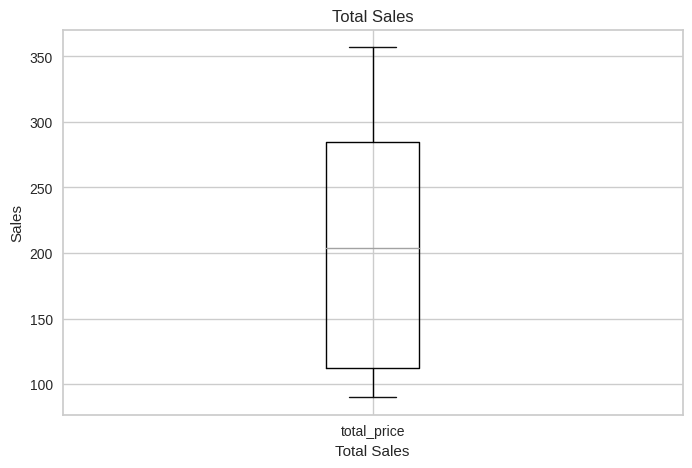

In [ ]:
# Visualize the results using a boxplot
fig, ax = plt.subplots(figsize = (8, 5))

boxplot = dfs_3.boxplot(
  column = "total_price",
  ax = ax
)

# Adding labels and title
ax.set_xlabel("Total Sales")
ax.grid(True)
ax.set_ylabel("Sales")
ax.set_title("Total Sales")

# Show the boxplot
plt.show()

In [ ]:
Q1 = dfs_3['total_price'].quantile(0.25)
Q3 = dfs_3['total_price'].quantile(0.75)
IQR = Q3 - Q1

# Outlier detection
outlier_1 = dfs_3['total_price'] <= Q1 - 1.5 * IQR
outlier_2 = dfs_3['total_price'] >= Q3 + 1.5 * IQR

dfs_3[outlier_1 | outlier_2]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price


Found out there're no ourliers data

# Export Cleaned Dataset

Prefer to join dataset in order to gathering the information in Google BigQuery because it's easier.

Notes : Please uncomment. ini sengaja di comment soalnya kalo awal buka dan run all, jadi auto ke-download terus2an.

In [ ]:
# dfs_3.to_csv('clean_sales.csv', index=False)

# file_path_dfs = '/content/clean_sales.csv'

# # Function to trigger file download
# def download_dataset(file_path_dfs):
#   # Trigger the download of the dataset file
#   files.download(file_path_dfs)

# # Call the function to download the dataset
# download_dataset(file_path_dfs)

# #

# dfp_2.to_csv('clean_products.csv', index=False)

# file_path_dfp = '/content/clean_products.csv'

# def download_dataset(file_path_dfp):
#   files.download(file_path_dfp)

# download_dataset(file_path_dfp)

# #

# dfo_2.to_csv('clean_orders.csv', index=False)

# file_path_dfo = '/content/clean_orders.csv'

# def download_dataset(file_path_dfo):
#   files.download(file_path_dfo)

# download_dataset(file_path_dfo)

# #

# dfc_2.to_csv('clean_customers.csv', index=False)

# file_path_dfc = '/content/clean_customers.csv'

# def download_dataset(file_path_dfc):
#   files.download(file_path_dfc)

# download_dataset(file_path_dfc)

Dataset Link on Google BigQuery : https://console.cloud.google.com/bigquery?ws=!1m4!1m3!3m2!1sdeepp-jan24-laksmisetiawati!2sdeepp_dataset

Google BigQuery Project : https://console.cloud.google.com/bigquery?project=deepp-jan24-laksmisetiawati

Github : https://github.com/laksmisetiawati/deepp_laksmi_setiawati (in case Google BigQuery can't be opened)

# Data Preparation

including join dataset, add new related column, etc.

## Customer Generation

reason : to group customer by generation and get analysis customer demography based on generation

In [ ]:
dfc_3 = dfc_2.copy()

In [ ]:
current_year = 2021 #asumsikan analyst dilakukan di desember 2021
dfc_3['birth_year'] = current_year - dfc_3['age']

# Create generation group
dfc_3['generation'] = pd.cut(
  dfc_3['birth_year'],
  bins=[1933, 1964, 1980, 1996, 2012, current_year],
  labels=['Boomer', 'Gen-X', 'Millennial', 'Gen-Z', 'Gen-Alpha']
)

dfc_3.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,birth_year,generation
0,9,Brittaney Gontier,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia,1970,Gen-X
1,919,Belia Hovard,Genderqueer,64,443 Jesse MewsApt. 726,24,New Imogen,Queensland,Australia,1957,Boomer
2,880,Kimbell Rawsen,Male,41,8674 Hermiston CrestApt. 615,27,North Aaronborough,Tasmania,Australia,1980,Gen-X
3,583,Prissie Dumelow,Genderqueer,52,98 Ellie CircleSuite 311,8267,Leomouth,Northern Territory,Australia,1969,Gen-X
4,770,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,2694,Port Isabelle,South Australia,Australia,1971,Gen-X


In [ ]:
years = dfc_3.groupby('birth_year').size().reset_index(name='total_customer').sort_values(by=['birth_year'], ascending=True)
years

,birth_year,total_customer
0,1941,15
1,1942,20
2,1943,18
3,1944,10
4,1945,13
...,...,...
56,1997,17
57,1998,19
58,1999,14
59,2000,15


## Total Orders Each Customers

reason : to compare total customer who made sales with customer who didn't made sales in 10 months

In [ ]:
total_orders = dfo_2.groupby('customer_id').size().reset_index(name='total_orders')

dfc_4 = pd.merge(dfc_3, total_orders, on='customer_id', how='left')
dfc_4['total_orders'] = dfc_4['total_orders'].fillna(0).astype(int)

dfc_4.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,birth_year,generation,total_orders
0,9,Brittaney Gontier,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia,1970,Gen-X,0
1,919,Belia Hovard,Genderqueer,64,443 Jesse MewsApt. 726,24,New Imogen,Queensland,Australia,1957,Boomer,0
2,880,Kimbell Rawsen,Male,41,8674 Hermiston CrestApt. 615,27,North Aaronborough,Tasmania,Australia,1980,Gen-X,0
3,583,Prissie Dumelow,Genderqueer,52,98 Ellie CircleSuite 311,8267,Leomouth,Northern Territory,Australia,1969,Gen-X,1
4,770,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,2694,Port Isabelle,South Australia,Australia,1971,Gen-X,1


## Total Revenue Each Customers

reason : ...

In [ ]:
# Join sales with order on 'order_id'
merge_dfos = pd.merge(dfo_2, dfs_3, on='order_id')
merge_dfos

# Calculate total revenue per customer
revenue_per_customer = merge_dfos.groupby('customer_id')['total_price'].sum().reset_index()
revenue_per_customer.rename(columns={'total_price': 'total_revenue'}, inplace=True)

dfc_5 = pd.merge(dfc_4, revenue_per_customer, on='customer_id', how='left')
dfc_5['total_revenue'] = dfc_5['total_revenue'].fillna(0).astype(int)

dfc_5.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,birth_year,generation,total_orders,total_revenue
0,9,Brittaney Gontier,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia,1970,Gen-X,0,0
1,919,Belia Hovard,Genderqueer,64,443 Jesse MewsApt. 726,24,New Imogen,Queensland,Australia,1957,Boomer,0,0
2,880,Kimbell Rawsen,Male,41,8674 Hermiston CrestApt. 615,27,North Aaronborough,Tasmania,Australia,1980,Gen-X,0,0
3,583,Prissie Dumelow,Genderqueer,52,98 Ellie CircleSuite 311,8267,Leomouth,Northern Territory,Australia,1969,Gen-X,1,645
4,770,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,2694,Port Isabelle,South Australia,Australia,1971,Gen-X,1,1015


## Customer Latest Order

In [ ]:
# Group by 'customer_id' and find the maximum 'order_date' for each customer
latest_order_date = dfo_2.groupby('customer_id')['order_date'].max().reset_index()
latest_order_date.rename(columns={'order_date': 'last_order_month'}, inplace=True)

latest_order_date['last_order_month'] = latest_order_date['last_order_month'].dt.strftime('%m')

# Merge 'last_order_month' with 'customer_df'
dfc_6 = pd.merge(dfc_5, latest_order_date, on='customer_id', how='left')
dfc_6['last_order_month'] = dfc_6['last_order_month'].fillna('00')
dfc_6['last_order_month'] = dfc_6['last_order_month'].astype(int)

dfc_6.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,birth_year,generation,total_orders,total_revenue,last_order_month
0,9,Brittaney Gontier,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia,1970,Gen-X,0,0,0
1,919,Belia Hovard,Genderqueer,64,443 Jesse MewsApt. 726,24,New Imogen,Queensland,Australia,1957,Boomer,0,0,0
2,880,Kimbell Rawsen,Male,41,8674 Hermiston CrestApt. 615,27,North Aaronborough,Tasmania,Australia,1980,Gen-X,0,0,0
3,583,Prissie Dumelow,Genderqueer,52,98 Ellie CircleSuite 311,8267,Leomouth,Northern Territory,Australia,1969,Gen-X,1,645,8
4,770,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,2694,Port Isabelle,South Australia,Australia,1971,Gen-X,1,1015,7


## Seasonal Revenue

In [ ]:
dfo_3 = dfo_2.copy()

In [ ]:
dfo_3['seasonal_month'] = dfo_3['order_date'].dt.strftime('%m').fillna('00').astype(int)

dfo_3.head()

,order_id,customer_id,payment,order_date,delivery_date,seasonal_month
0,455,1,24550,2021-04-04,2021-04-06,4
1,670,1,10246,2021-03-06,2021-04-01,3
2,729,1,35593,2021-02-18,2021-03-01,2
3,465,7,48935,2021-05-21,2021-05-23,5
4,595,10,45626,2021-03-09,2021-03-29,3


The seasons are defined as
* Summer (December, January, February)
* Autumn (March, April, May)
* Winter (June, July, August)
* Spring (September, October, November)

source: https://www.australia.com/en/facts-and-planning/weather-in-australia.html

Seasonal Revenue will be checked on Tableau.

# Data Visualisation Preparation

Notes : Please uncomment. ini sengaja di comment soalnya kalo awal buka dan run all, jadi auto ke download terus2an.

In [ ]:
# dfs_3.to_csv('new_sales.csv', index=False)

# file_path_dfs = '/content/new_sales.csv'

# def download_dataset(file_path_dfs):
#   files.download(file_path_dfs)

# download_dataset(file_path_dfs)

# #

# dfp_2.to_csv('new_products.csv', index=False)

# file_path_dfp = '/content/new_products.csv'

# def download_dataset(file_path_dfp):
#   files.download(file_path_dfp)

# download_dataset(file_path_dfp)

# #

# dfo_3.to_csv('new_orders.csv', index=False)

# file_path_dfo = '/content/new_orders.csv'

# def download_dataset(file_path_dfo):
#   files.download(file_path_dfo)

# download_dataset(file_path_dfo)

# #

# dfc_6.to_csv('new_customers.csv', index=False)

# file_path_dfc = '/content/new_customers.csv'

# def download_dataset(file_path_dfc):
#   files.download(file_path_dfc)

# download_dataset(file_path_dfc)

Exported dataset will be used for insight in Tableau.

Tableau Dashboard :
https://public.tableau.com/app/profile/laksmi.setiawati/viz/DEEPP_JAN24_Laksmi_Setiawati/Dashboard



---

